In [1]:
# insert code here

## Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

import tensorflow as tf

# import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.constraints import maxnorm

In [2]:
from keras.datasets import cifar10

In [3]:
seed = 42

In [4]:
# Loading data

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
# Normalize the numbers

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# One hot encode outputs

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [8]:
# Model architecture

model = Sequential()

In [9]:
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Output 
model.add(Dense(class_num, activation = 'softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [11]:
# Compile

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
# Fit
#np.random.seed(seed)

%time
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 64)


CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/25
782/782 [==============================] - 231s 293ms/step - loss: 1.5787 - accuracy: 0.4410 - val_loss: 1.4088 - val_accuracy: 0.5221
Epoch 2/25
782/782 [==============================] - 208s 266ms/step - loss: 1.1053 - accuracy: 0.6070 - val_loss: 0.9679 - val_accuracy: 0.6583
Epoch 3/25
782/782 [==============================] - 83s 107ms/step - loss: 0.9330 - accuracy: 0.6732 - val_loss: 0.8488 - val_accuracy: 0.7002
Epoch 4/25
782/782 [==============================] - 226s 289ms/step - loss: 0.8303 - accuracy: 0.7088 - val_loss: 0.7834 - val_accuracy: 0.7296
Epoch 5/25
782/782 [==============================] - 230s 294ms/step - loss: 0.7677 - accuracy: 0.7327 - val_loss: 0.6744 - val_accuracy: 0.7609
Epoch 6/25
782/782 [==============================] - 234s 300ms/step - loss: 0.7144 - accuracy: 0.7516 - val_loss: 0.6486 - val_accuracy: 0.7734
Epoch 7/25
782/782 [==============================] - 227s 290ms/step - loss: 0.6730 -

In [14]:
%%time
predictions = np.argmax(model.predict(X_test),axis=1)

CPU times: total: 19.4 s
Wall time: 3.4 s


In [15]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 5s 4ms/step - loss: 0.5090 - accuracy: 0.8271

Test loss: 0.509037, Test accuracy: 0.827100


In [16]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [17]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 858   3  19  21   7   0   4   6  78   4 
  1|  14 902   4   7   2   2   7   1  32  29 
  2|  55   0 751  60  49  23  36  11  13   2 
  3|  14   0  54 779  25  76  33  12   7   0 
  4|   5   1  39  95 775  21  37  18   9   0 
  5|   9   0  26 222  24 695   8  13   3   0 
  6|   6   0  29  61   8   7 885   2   2   0 
  7|  10   2  20  41  35  46   5 836   2   3 
  8|  27   3   6  13   3   2   2   1 938   5 
  9|  30  42   4  20   2   2   6   7  35 852 


In [18]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

In [19]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

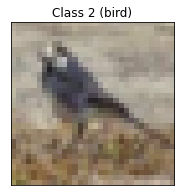

In [20]:
check_one(X_test, predictions, actual = y_test, compare = True)

In [21]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

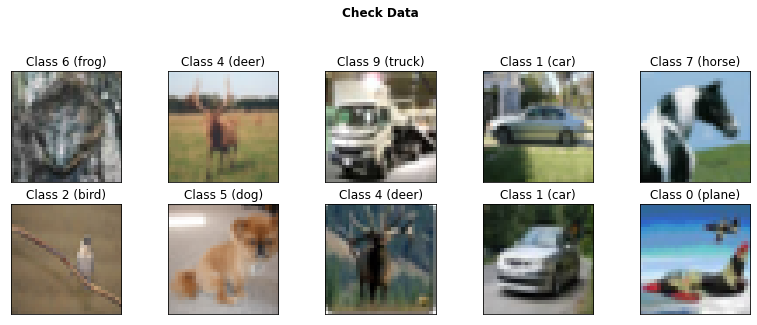

In [22]:
check_ten(X_test, predictions, y_test, True)

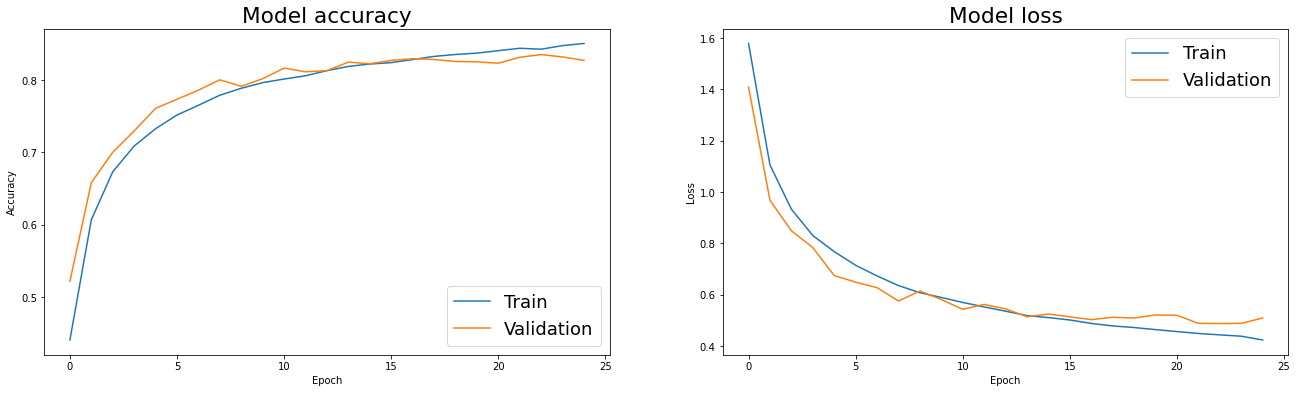

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()